## Real Case "SMALL DATA"

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/img/tom1.png' width=900>

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/img/tom2.png' width=900>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/realcase/dataset_costi.xlsx

#Target colonna "costi anno 2020"

In [3]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/realcase/dataset_costi.xlsx'

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/pandas_.png' width=500>

In [4]:
# Step 1 Carichiamo il datset su un Dataframe
df = pd.read_excel(path)
df

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,...,var129,var130,var131,var132,var133,var134,var135,var136,var137,var138,var139,var140,var141,var142,var143,var144,var145,var146,var147,var148,var149,var150,var151,var152,ATECO 2007\ncodice,Indirizzo sede legale,Indirizzo sede legale - Codice postale,Indirizzo sede legale - Comune,Provincia,Indirizzo sede legale - Regione,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,71387976,23064675,20882011,14244395,2794279,2677799,2833077,14562964,14352577,8073273,0,0,0,0,0,73273,0,0,0,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,0,0,...,1588604,1604455,1856974,36310,-66672,135970,0,0,0,0,0,0,1870101,3257494,4594656,n.d.,n.d.,n.d.,-3027241,1534078,3813249,229,214,207,zyx56973,via abc112,abc445,Nerviano,Milano,Lombardia,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,1602930,23503659,22973259,20946238,13368527,12404318,11085331,1850794,1693511,1060485,364872,1287356,811956,1485922,406155,248529,0,0,0,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,1583,1583,...,769967,895916,1201286,11943,82820,1553908,0,0,0,0,0,0,1373420,1220932,1304576,n.d.,n.d.,n.d.,1924469,2124721,2204557,454,411,456,zyx56974,via abc113,abc446,Milano,Milano,Lombardia,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,745000,51250000,51604000,50992000,23900000,25404000,26269000,69000,66000,56000,0,0,0,0,0,0,0,0,0,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,0,0,...,915000,1122000,1153000,-1000,3000,-10000,0,0,-36000,0,0,0,9000,1166000,1450000,n.d.,n.d.,n.d.,-803000,3170000,2408000,116,165,168,zyx56975,via abc114,abc447,Valle Lomellina,Pavia,Lombardia,20682,258,10698,1801000,1761000,1171000,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,0,0,0,39316,5715,8015,5258584,5491288,5735791,4183889,4354175,4510666,25917,25917,25917,25917,25917,25917,0,0,0,0,0,0,25923161,17921979,19627665,21948953,22868722,23881755,15584991,15576621,23831452,0,0,...,428722,439358,525316,34150,95776,-114667,0,0,0,0,0,0,80381,185005,258220,n.d.,n.d.,n.d.,478455,494325,473999,60,60,65,zyx56976,via abc115,abc448,Spilamberto,Modena,Emilia-Romagna,20683,259,10699,890646,0,0,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,0,0,0,6571906,3613836,3218188,65670888,56917531,51856050,20251827,20965972,20661743,2324116,2070401,179562,1754388,1625505,178366,0,1196,1196,0,0,0,18950865,16878270,18797216,8362491,16303624,14624193,4425910,11432236,11013435,0,0,...,781590,787832,1051073,-481,-95,-697,0,0,0,0,0,0,472994,795056,943092,n.d.,n.d.,n.d.,966348,1243727,869544,171,141,132,zyx56977,via abc116,abc449,Moretta,Cuneo,Piemonte,20684,260,10700,0,0,0,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,n.d.,n.d.,0,n.d.,n.d.,1500,n.d.,n.d.,0,n.d.,n.d.,0,n.d.,n.d.,0,n.d.,n.d.,0,0,0,0,0,0,0,n.d.,n.d.,0,n.d.,n.d.,106391,n.d.,n.d.,0,0,0,0,n.d.,...,56,n.d.,n.d.,0,n.d.,n.d.,0,n.d.,n.d.,0,n.d.,n.d.,9054,n.d.,n.d.,n.d.,n.d.,n.d.,20613,n.d.,n.d.,10,n.d.,n.d.,zyx64892,"VIA ENRICO TOTI, 22",abc8364,Monza,Monza e della Brianza,Lombardia,28599,8175,18615,0,n.d.,n.d.,0,n.d.,n.d.,Produ
7920,8021,company8021,80757,n.d.,n.d

In [5]:
# Step 2: Verifichiamo il dtypes, oopss... funziona solo per un numero ridotto di colonne, pazienza... 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Columns: 171 entries, index to var159
dtypes: int64(68), object(103)
memory usage: 10.3+ MB


In [6]:
def display_col_info(df):
    # create a dictionary to store the number of unique values and data type of each column
    col_info = {'Unique_values': df.nunique(), 'Dtype': df.dtypes}
    col_info_df = pd.DataFrame(col_info).T
    col_info_df.index.name = 'Column'
    col_info_df = col_info_df.reset_index()
    return col_info_df.set_index('Column').T.sort_values('Unique_values')

In [7]:
display_col_info(df)

Column,Unique_values,Dtype
var159,1,object
var144,1,object
var145,1,object
var146,1,object
var25,2,object
...,...,...
Codice fiscale,7924,int64
Partita IVA,7924,int64
Ragione sociale,7924,object
ATECO 2007\ncodice,7924,object


In [8]:
# Step 3: Verifichiamo le mediane delle colonne numeriche
df.median(numeric_only=True)

index                 4062.5
costi anno 2020    1611384.0
var3                     0.0
var6                 13038.0
var9                303505.0
                     ...    
Numero CCIAA         24641.5
Codice fiscale        4217.5
Partita IVA          14657.5
var153                   0.0
var156              102919.5
Length: 68, dtype: float64

In [9]:
df.median(numeric_only=True).sort_values()

var81                    0.0
var153                   0.0
var82                    0.0
var83                    0.0
var60                    0.0
                     ...    
var99               834556.5
var66               864360.5
var51              1446569.0
costi anno 2020    1611384.0
var93              1672529.5
Length: 68, dtype: float64

In [10]:
#ci sono delle stringhe in var1 var2 pur essendo numeriche, come mai??
#inoltre anche se non numeriche Numero CCIAA e Codice fiscale e PIVA non sono numeri che posso utilizzare, bensì ID
df['var2'].value_counts()


var2
n.d.       751
0          159
188805       2
491378       2
584036       2
          ... 
4015463      1
4204346      1
3390674      1
3778266      1
169365       1
Name: count, Length: 7012, dtype: int64

In [11]:
## Trovato!! Abbiamo il nostro primo n.d. che sporca la colonna
# Step 4: Spstituiamo su tutto il dataset n.d. con 0

df = df.replace({'n.d.':0})
df

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,...,var129,var130,var131,var132,var133,var134,var135,var136,var137,var138,var139,var140,var141,var142,var143,var144,var145,var146,var147,var148,var149,var150,var151,var152,ATECO 2007\ncodice,Indirizzo sede legale,Indirizzo sede legale - Codice postale,Indirizzo sede legale - Comune,Provincia,Indirizzo sede legale - Regione,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,71387976,23064675,20882011,14244395,2794279,2677799,2833077,14562964,14352577,8073273,0,0,0,0,0,73273,0,0,0,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,0,0,...,1588604,1604455,1856974,36310,-66672,135970,0,0,0,0,0,0,1870101,3257494,4594656,0,0,0,-3027241,1534078,3813249,229,214,207,zyx56973,via abc112,abc445,Nerviano,Milano,Lombardia,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,1602930,23503659,22973259,20946238,13368527,12404318,11085331,1850794,1693511,1060485,364872,1287356,811956,1485922,406155,248529,0,0,0,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,1583,1583,...,769967,895916,1201286,11943,82820,1553908,0,0,0,0,0,0,1373420,1220932,1304576,0,0,0,1924469,2124721,2204557,454,411,456,zyx56974,via abc113,abc446,Milano,Milano,Lombardia,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,745000,51250000,51604000,50992000,23900000,25404000,26269000,69000,66000,56000,0,0,0,0,0,0,0,0,0,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,0,0,...,915000,1122000,1153000,-1000,3000,-10000,0,0,-36000,0,0,0,9000,1166000,1450000,0,0,0,-803000,3170000,2408000,116,165,168,zyx56975,via abc114,abc447,Valle Lomellina,Pavia,Lombardia,20682,258,10698,1801000,1761000,1171000,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,0,0,0,39316,5715,8015,5258584,5491288,5735791,4183889,4354175,4510666,25917,25917,25917,25917,25917,25917,0,0,0,0,0,0,25923161,17921979,19627665,21948953,22868722,23881755,15584991,15576621,23831452,0,0,...,428722,439358,525316,34150,95776,-114667,0,0,0,0,0,0,80381,185005,258220,0,0,0,478455,494325,473999,60,60,65,zyx56976,via abc115,abc448,Spilamberto,Modena,Emilia-Romagna,20683,259,10699,890646,0,0,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,0,0,0,6571906,3613836,3218188,65670888,56917531,51856050,20251827,20965972,20661743,2324116,2070401,179562,1754388,1625505,178366,0,1196,1196,0,0,0,18950865,16878270,18797216,8362491,16303624,14624193,4425910,11432236,11013435,0,0,...,781590,787832,1051073,-481,-95,-697,0,0,0,0,0,0,472994,795056,943092,0,0,0,966348,1243727,869544,171,141,132,zyx56977,via abc116,abc449,Moretta,Cuneo,Piemonte,20684,260,10700,0,0,0,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,0,0,0,0,0,1500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106391,0,0,0,0,0,0,0,...,56,0,0,0,0,0,0,0,0,0,0,0,9054,0,0,0,0,0,20613,0,0,10,0,0,zyx64892,"VIA ENRICO TOTI, 22",abc8364,Monza,Monza e della Brianza,Lombardia,28599,8175,18615,0,0,0,0,0,0,Produ
7920,8021,company8021,80757,0,0,0,0,0,1500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76547,0,0,0,0,0,0,0,...,70,0,0,0,0,0,0,0,0,0,0,0,5063,0,0,0,0,0,7903,0,0,29,0,0,zyx64893,"VIA ENRICO TOTI, 22",a

In [12]:
# check Nan values
df.isnull().sum().sort_values(ascending=False) # ce ne sono 2, le droppo

Indirizzo sede legale             2
Indirizzo sede legale - Comune    2
index                             0
var105                            0
var107                            0
                                 ..
var56                             0
var57                             0
var58                             0
var59                             0
var159                            0
Length: 171, dtype: int64

In [13]:
# Step 5: Sono solo 2 righe, possiamo droppare i Nan
df = df.dropna()
df

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,...,var129,var130,var131,var132,var133,var134,var135,var136,var137,var138,var139,var140,var141,var142,var143,var144,var145,var146,var147,var148,var149,var150,var151,var152,ATECO 2007\ncodice,Indirizzo sede legale,Indirizzo sede legale - Codice postale,Indirizzo sede legale - Comune,Provincia,Indirizzo sede legale - Regione,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,71387976,23064675,20882011,14244395,2794279,2677799,2833077,14562964,14352577,8073273,0,0,0,0,0,73273,0,0,0,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,0,0,...,1588604,1604455,1856974,36310,-66672,135970,0,0,0,0,0,0,1870101,3257494,4594656,0,0,0,-3027241,1534078,3813249,229,214,207,zyx56973,via abc112,abc445,Nerviano,Milano,Lombardia,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,1602930,23503659,22973259,20946238,13368527,12404318,11085331,1850794,1693511,1060485,364872,1287356,811956,1485922,406155,248529,0,0,0,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,1583,1583,...,769967,895916,1201286,11943,82820,1553908,0,0,0,0,0,0,1373420,1220932,1304576,0,0,0,1924469,2124721,2204557,454,411,456,zyx56974,via abc113,abc446,Milano,Milano,Lombardia,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,745000,51250000,51604000,50992000,23900000,25404000,26269000,69000,66000,56000,0,0,0,0,0,0,0,0,0,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,0,0,...,915000,1122000,1153000,-1000,3000,-10000,0,0,-36000,0,0,0,9000,1166000,1450000,0,0,0,-803000,3170000,2408000,116,165,168,zyx56975,via abc114,abc447,Valle Lomellina,Pavia,Lombardia,20682,258,10698,1801000,1761000,1171000,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,0,0,0,39316,5715,8015,5258584,5491288,5735791,4183889,4354175,4510666,25917,25917,25917,25917,25917,25917,0,0,0,0,0,0,25923161,17921979,19627665,21948953,22868722,23881755,15584991,15576621,23831452,0,0,...,428722,439358,525316,34150,95776,-114667,0,0,0,0,0,0,80381,185005,258220,0,0,0,478455,494325,473999,60,60,65,zyx56976,via abc115,abc448,Spilamberto,Modena,Emilia-Romagna,20683,259,10699,890646,0,0,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,0,0,0,6571906,3613836,3218188,65670888,56917531,51856050,20251827,20965972,20661743,2324116,2070401,179562,1754388,1625505,178366,0,1196,1196,0,0,0,18950865,16878270,18797216,8362491,16303624,14624193,4425910,11432236,11013435,0,0,...,781590,787832,1051073,-481,-95,-697,0,0,0,0,0,0,472994,795056,943092,0,0,0,966348,1243727,869544,171,141,132,zyx56977,via abc116,abc449,Moretta,Cuneo,Piemonte,20684,260,10700,0,0,0,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,0,0,0,0,0,1500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106391,0,0,0,0,0,0,0,...,56,0,0,0,0,0,0,0,0,0,0,0,9054,0,0,0,0,0,20613,0,0,10,0,0,zyx64892,"VIA ENRICO TOTI, 22",abc8364,Monza,Monza e della Brianza,Lombardia,28599,8175,18615,0,0,0,0,0,0,Produ
7920,8021,company8021,80757,0,0,0,0,0,1500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76547,0,0,0,0,0,0,0,...,70,0,0,0,0,0,0,0,0,0,0,0,5063,0,0,0,0,0,7903,0,0,29,0,0,zyx64893,"VIA ENRICO TOTI, 22",a

In [14]:
## Step 5.1 drop duplicates
df = df.drop_duplicates()
df  #still 7922 --> no duplicates

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,...,var129,var130,var131,var132,var133,var134,var135,var136,var137,var138,var139,var140,var141,var142,var143,var144,var145,var146,var147,var148,var149,var150,var151,var152,ATECO 2007\ncodice,Indirizzo sede legale,Indirizzo sede legale - Codice postale,Indirizzo sede legale - Comune,Provincia,Indirizzo sede legale - Regione,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,71387976,23064675,20882011,14244395,2794279,2677799,2833077,14562964,14352577,8073273,0,0,0,0,0,73273,0,0,0,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,0,0,...,1588604,1604455,1856974,36310,-66672,135970,0,0,0,0,0,0,1870101,3257494,4594656,0,0,0,-3027241,1534078,3813249,229,214,207,zyx56973,via abc112,abc445,Nerviano,Milano,Lombardia,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,1602930,23503659,22973259,20946238,13368527,12404318,11085331,1850794,1693511,1060485,364872,1287356,811956,1485922,406155,248529,0,0,0,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,1583,1583,...,769967,895916,1201286,11943,82820,1553908,0,0,0,0,0,0,1373420,1220932,1304576,0,0,0,1924469,2124721,2204557,454,411,456,zyx56974,via abc113,abc446,Milano,Milano,Lombardia,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,745000,51250000,51604000,50992000,23900000,25404000,26269000,69000,66000,56000,0,0,0,0,0,0,0,0,0,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,0,0,...,915000,1122000,1153000,-1000,3000,-10000,0,0,-36000,0,0,0,9000,1166000,1450000,0,0,0,-803000,3170000,2408000,116,165,168,zyx56975,via abc114,abc447,Valle Lomellina,Pavia,Lombardia,20682,258,10698,1801000,1761000,1171000,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,0,0,0,39316,5715,8015,5258584,5491288,5735791,4183889,4354175,4510666,25917,25917,25917,25917,25917,25917,0,0,0,0,0,0,25923161,17921979,19627665,21948953,22868722,23881755,15584991,15576621,23831452,0,0,...,428722,439358,525316,34150,95776,-114667,0,0,0,0,0,0,80381,185005,258220,0,0,0,478455,494325,473999,60,60,65,zyx56976,via abc115,abc448,Spilamberto,Modena,Emilia-Romagna,20683,259,10699,890646,0,0,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,0,0,0,6571906,3613836,3218188,65670888,56917531,51856050,20251827,20965972,20661743,2324116,2070401,179562,1754388,1625505,178366,0,1196,1196,0,0,0,18950865,16878270,18797216,8362491,16303624,14624193,4425910,11432236,11013435,0,0,...,781590,787832,1051073,-481,-95,-697,0,0,0,0,0,0,472994,795056,943092,0,0,0,966348,1243727,869544,171,141,132,zyx56977,via abc116,abc449,Moretta,Cuneo,Piemonte,20684,260,10700,0,0,0,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,0,0,0,0,0,1500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106391,0,0,0,0,0,0,0,...,56,0,0,0,0,0,0,0,0,0,0,0,9054,0,0,0,0,0,20613,0,0,10,0,0,zyx64892,"VIA ENRICO TOTI, 22",abc8364,Monza,Monza e della Brianza,Lombardia,28599,8175,18615,0,0,0,0,0,0,Produ
7920,8021,company8021,80757,0,0,0,0,0,1500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76547,0,0,0,0,0,0,0,...,70,0,0,0,0,0,0,0,0,0,0,0,5063,0,0,0,0,0,7903,0,0,29,0,0,zyx64893,"VIA ENRICO TOTI, 22",a

In [15]:
# adesso la mediana comprende anche var2 e var3 e tutte le colonne che prima venivano viste come object
df.median(numeric_only=True)

index                 4062.5
costi anno 2020    1611384.0
var1               1478972.0
var2               1349412.5
var3                     0.0
                     ...    
var154                   0.0
var155                   0.0
var156              102919.5
var157               85859.0
var158               65776.0
Length: 163, dtype: float64

In [16]:
# Step 6: Cerchiamo tutte le colonne dove la MEDIANA è ==0
median_values = df.median(numeric_only=True)
columns_with_zero_median = median_values.where(median_values == 0).dropna().index
columns_with_zero_median = columns_with_zero_median.to_list()
len(columns_with_zero_median)

## Droppiamo questa liste di colonne
df = df.drop(columns_with_zero_median,axis=1)
df

,index,Ragione sociale,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,var11,var15,var16,var17,var27,var28,var29,var30,var31,var32,var33,var34,var35,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var63,var64,...,var105,var106,var107,var108,var109,var110,var111,var112,var113,var123,var124,var125,var126,var127,var128,var129,var130,var131,var141,var142,var143,var147,var148,var149,var150,var151,var152,ATECO 2007\ncodice,Indirizzo sede legale,Indirizzo sede legale - Codice postale,Indirizzo sede legale - Comune,Provincia,Indirizzo sede legale - Regione,Numero CCIAA,Codice fiscale,Partita IVA,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,14562964,14352577,8073273,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,7834908,2178851,18788146,290899,188430,570560,141846752,144110326,153086306,69193271,72220512,85886434,4033074,4033074,4033074,812758,940485,...,1892059,1841524,1807968,13310780,13264428,12114005,14296757,13558421,13421133,1228034,977093,1122097,783131,572136,267603,1588604,1604455,1856974,1870101,3257494,4594656,-3027241,1534078,3813249,229,214,207,zyx56973,via abc112,abc445,Nerviano,Milano,Lombardia,20680,256,10696,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,1850794,1693511,1060485,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,5293624,2889766,1616895,408806,551290,687712,90370961,88141721,80612876,21212948,18327864,16372048,9000000,9000000,8000000,555689,586514,...,1290053,1340018,1338016,16889643,15833127,15986500,2713441,2434423,2180861,912728,1042592,1058524,80006,47390,35171,769967,895916,1201286,1373420,1220932,1304576,1924469,2124721,2204557,454,411,456,zyx56974,via abc113,abc446,Milano,Milano,Lombardia,20681,257,10697,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,69000,66000,56000,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,19082000,4224000,5958000,1596000,7000,0,121594000,116612000,113749000,24965000,25707000,23690000,5933000,5933000,5933000,685000,804000,...,199000,118000,180000,9901000,10029000,9581000,3832000,3762000,3497000,2624000,2743000,1937000,53000,59000,59000,915000,1122000,1153000,9000,1166000,1450000,-803000,3170000,2408000,116,165,168,zyx56975,via abc114,abc447,Valle Lomellina,Pavia,Lombardia,20682,258,10698,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25917,25917,25917,25923161,17921979,19627665,21948953,22868722,23881755,15584991,15576621,23831452,185206,54173,1151195,643650,567191,677336,54024787,49161601,51107674,11928401,11449946,10955620,1976000,1976000,1976000,516863,536725,...,58016,55497,43112,3075383,3296773,3290801,631775,638706,725484,421274,885471,377168,217482,149383,155720,428722,439358,525316,80381,185005,258220,478455,494325,473999,60,60,65,zyx56976,via abc115,abc448,Spilamberto,Modena,Emilia-Romagna,20683,259,10699,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,2324116,2070401,179562,18950865,16878270,18797216,8362491,16303624,14624193,4425910,11432236,11013435,14381920,10465984,10529721,1463431,707312,527470,117725617,106956958,99732400,15404312,14454587,13758507,12000000,12000000,12000000,896335,1298754,...,417592,393338,542586,6335628,5294076,4974163,5310610,4361914,3345706,1676826,1524379,2270501,31436,12726,60454,781590,787832,1051073,472994,795056,943092,966348,1243727,869544,171,141,132,zyx56977,via abc116,abc449,Moretta,Cuneo,Piemonte,20684,260,10700,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [17]:
df.columns

Index(['index', 'Ragione sociale', 'costi anno 2020', 'var1', 'var2', 'var6',
       'var7', 'var8', 'var9', 'var10',
       ...
       'Indirizzo sede legale - Comune', 'Provincia',
       'Indirizzo sede legale - Regione', 'Numero CCIAA', 'Codice fiscale',
       'Partita IVA', 'var156', 'var157', 'var158', 'var159'],
      dtype='object', length=108)

In [18]:
#check colonne stringhe
for col in df.columns.to_list():
    if df[col].dtype == 'object':
        print(col)
    else:
        pass

Ragione sociale
ATECO 2007
codice
Indirizzo sede legale
Indirizzo sede legale - Codice postale
Indirizzo sede legale - Comune
Provincia
Indirizzo sede legale - Regione
var159


In [19]:
# rimuovo le variabili specifiche del singolo observation e quelle categoriche come prima approssimazione

id_riga = ['index', 'Ragione sociale', 'Indirizzo sede legale - Comune', 'Provincia','Indirizzo sede legale - Regione', 
           'Numero CCIAA', 'Codice fiscale','Partita IVA','var159','ATECO 2007\ncodice','Indirizzo sede legale', 'Indirizzo sede legale - Codice postale',
           ]

df = df.drop(id_riga,axis=1)
df

,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,var11,var15,var16,var17,var27,var28,var29,var30,var31,var32,var33,var34,var35,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var63,var64,var65,var66,...,var95,var96,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var123,var124,var125,var126,var127,var128,var129,var130,var131,var141,var142,var143,var147,var148,var149,var150,var151,var152,var156,var157,var158
0,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,14562964,14352577,8073273,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,7834908,2178851,18788146,290899,188430,570560,141846752,144110326,153086306,69193271,72220512,85886434,4033074,4033074,4033074,812758,940485,1060351,62928609,...,149021406,1135448,1033613,392038,85824629,86758885,83651116,30573391,27161965,27459901,1892059,1841524,1807968,13310780,13264428,12114005,14296757,13558421,13421133,1228034,977093,1122097,783131,572136,267603,1588604,1604455,1856974,1870101,3257494,4594656,-3027241,1534078,3813249,229,214,207,25290616,24108358,24535319
1,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,1850794,1693511,1060485,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,5293624,2889766,1616895,408806,551290,687712,90370961,88141721,80612876,21212948,18327864,16372048,9000000,9000000,8000000,555689,586514,594299,65207408,...,166417107,2028227,778100,3166950,102237238,113037130,131392006,11501816,11119691,13728039,1290053,1340018,1338016,16889643,15833127,15986500,2713441,2434423,2180861,912728,1042592,1058524,80006,47390,35171,769967,895916,1201286,1373420,1220932,1304576,1924469,2124721,2204557,454,411,456,14133394,10404117,12898505
2,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,69000,66000,56000,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,19082000,4224000,5958000,1596000,7000,0,121594000,116612000,113749000,24965000,25707000,23690000,5933000,5933000,5933000,685000,804000,892000,91688000,...,148906000,5273000,6221000,6157000,117422000,111227000,108035000,21643000,19825000,18553000,199000,118000,180000,9901000,10029000,9581000,3832000,3762000,3497000,2624000,2743000,1937000,53000,59000,59000,915000,1122000,1153000,9000,1166000,1450000,-803000,3170000,2408000,116,165,168,31861000,22494000,24687000
3,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25917,25917,25917,25923161,17921979,19627665,21948953,22868722,23881755,15584991,15576621,23831452,185206,54173,1151195,643650,567191,677336,54024787,49161601,51107674,11928401,11449946,10955620,1976000,1976000,1976000,516863,536725,575637,40609649,...,143260149,456101,472875,489105,105779603,129982682,121831610,10515673,10102156,12005008,58016,55497,43112,3075383,3296773,3290801,631775,638706,725484,421274,885471,377168,217482,149383,155720,428722,439358,525316,80381,185005,258220,478455,494325,473999,60,60,65,1000000,0,1188439
4,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,2324116,2070401,179562,18950865,16878270,18797216,8362491,16303624,14624193,4425910,11432236,11013435,14381920,10465984,10529721,1463431,707312,527470,117725617,106956958,99732400,15404312,14454587,13758507,12000000,12000000,12000000,896335,1298754,1071715,100872660,...,130682792,331385,261630,455198,149110551,119058121,106955719,11984035,11483667,11814301,417592,393338,542586,6335628,5294076,4974163,5310610,4361914,3345706,1676826,1524379,2270501,31436,12726,60454,781590,787832,1051073,472994,795056,943092,966348,1243727,869544,171,141,132,27325115,24037285,24492237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [20]:
## CHECK ZERI per righe
# aggiungo il conteggio degli zeri per riga e li sommo
# nella colonna Total_Zeros

df['Total_Zeros'] = (df == 0).sum(axis=1) 
df

,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,var11,var15,var16,var17,var27,var28,var29,var30,var31,var32,var33,var34,var35,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var63,var64,var65,var66,...,var96,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var123,var124,var125,var126,var127,var128,var129,var130,var131,var141,var142,var143,var147,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros
0,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,14562964,14352577,8073273,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,7834908,2178851,18788146,290899,188430,570560,141846752,144110326,153086306,69193271,72220512,85886434,4033074,4033074,4033074,812758,940485,1060351,62928609,...,1135448,1033613,392038,85824629,86758885,83651116,30573391,27161965,27459901,1892059,1841524,1807968,13310780,13264428,12114005,14296757,13558421,13421133,1228034,977093,1122097,783131,572136,267603,1588604,1604455,1856974,1870101,3257494,4594656,-3027241,1534078,3813249,229,214,207,25290616,24108358,24535319,2
1,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,1850794,1693511,1060485,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,5293624,2889766,1616895,408806,551290,687712,90370961,88141721,80612876,21212948,18327864,16372048,9000000,9000000,8000000,555689,586514,594299,65207408,...,2028227,778100,3166950,102237238,113037130,131392006,11501816,11119691,13728039,1290053,1340018,1338016,16889643,15833127,15986500,2713441,2434423,2180861,912728,1042592,1058524,80006,47390,35171,769967,895916,1201286,1373420,1220932,1304576,1924469,2124721,2204557,454,411,456,14133394,10404117,12898505,0
2,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,69000,66000,56000,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,19082000,4224000,5958000,1596000,7000,0,121594000,116612000,113749000,24965000,25707000,23690000,5933000,5933000,5933000,685000,804000,892000,91688000,...,5273000,6221000,6157000,117422000,111227000,108035000,21643000,19825000,18553000,199000,118000,180000,9901000,10029000,9581000,3832000,3762000,3497000,2624000,2743000,1937000,53000,59000,59000,915000,1122000,1153000,9000,1166000,1450000,-803000,3170000,2408000,116,165,168,31861000,22494000,24687000,1
3,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25917,25917,25917,25923161,17921979,19627665,21948953,22868722,23881755,15584991,15576621,23831452,185206,54173,1151195,643650,567191,677336,54024787,49161601,51107674,11928401,11449946,10955620,1976000,1976000,1976000,516863,536725,575637,40609649,...,456101,472875,489105,105779603,129982682,121831610,10515673,10102156,12005008,58016,55497,43112,3075383,3296773,3290801,631775,638706,725484,421274,885471,377168,217482,149383,155720,428722,439358,525316,80381,185005,258220,478455,494325,473999,60,60,65,1000000,0,1188439,2
4,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,2324116,2070401,179562,18950865,16878270,18797216,8362491,16303624,14624193,4425910,11432236,11013435,14381920,10465984,10529721,1463431,707312,527470,117725617,106956958,99732400,15404312,14454587,13758507,12000000,12000000,12000000,896335,1298754,1071715,100872660,...,331385,261630,455198,149110551,119058121,106955719,11984035,11483667,11814301,417592,393338,542586,6335628,5294076,4974163,5310610,4361914,3345706,1676826,1524379,2270501,31436,12726,60454,781590,787832,1051073,472994,795056,943092,966348,1243727,869544,171,141,132,27325115,24037285,24492237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [21]:
df.shape[1] # numero colonne

97

In [22]:
threshold_zeri_riga = 0.25 * df.shape[1] # tengo solo le righe con max 25% di zeri totali

# Drop rows where 'Total_Zeros' is greater than the threshold
df = df[df['Total_Zeros'] <= threshold_zeri_riga].reset_index(drop=True)
df

,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,var11,var15,var16,var17,var27,var28,var29,var30,var31,var32,var33,var34,var35,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var63,var64,var65,var66,...,var96,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var123,var124,var125,var126,var127,var128,var129,var130,var131,var141,var142,var143,var147,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros
0,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,14562964,14352577,8073273,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,7834908,2178851,18788146,290899,188430,570560,141846752,144110326,153086306,69193271,72220512,85886434,4033074,4033074,4033074,812758,940485,1060351,62928609,...,1135448,1033613,392038,85824629,86758885,83651116,30573391,27161965,27459901,1892059,1841524,1807968,13310780,13264428,12114005,14296757,13558421,13421133,1228034,977093,1122097,783131,572136,267603,1588604,1604455,1856974,1870101,3257494,4594656,-3027241,1534078,3813249,229,214,207,25290616,24108358,24535319,2
1,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,1850794,1693511,1060485,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,5293624,2889766,1616895,408806,551290,687712,90370961,88141721,80612876,21212948,18327864,16372048,9000000,9000000,8000000,555689,586514,594299,65207408,...,2028227,778100,3166950,102237238,113037130,131392006,11501816,11119691,13728039,1290053,1340018,1338016,16889643,15833127,15986500,2713441,2434423,2180861,912728,1042592,1058524,80006,47390,35171,769967,895916,1201286,1373420,1220932,1304576,1924469,2124721,2204557,454,411,456,14133394,10404117,12898505,0
2,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,69000,66000,56000,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,19082000,4224000,5958000,1596000,7000,0,121594000,116612000,113749000,24965000,25707000,23690000,5933000,5933000,5933000,685000,804000,892000,91688000,...,5273000,6221000,6157000,117422000,111227000,108035000,21643000,19825000,18553000,199000,118000,180000,9901000,10029000,9581000,3832000,3762000,3497000,2624000,2743000,1937000,53000,59000,59000,915000,1122000,1153000,9000,1166000,1450000,-803000,3170000,2408000,116,165,168,31861000,22494000,24687000,1
3,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25917,25917,25917,25923161,17921979,19627665,21948953,22868722,23881755,15584991,15576621,23831452,185206,54173,1151195,643650,567191,677336,54024787,49161601,51107674,11928401,11449946,10955620,1976000,1976000,1976000,516863,536725,575637,40609649,...,456101,472875,489105,105779603,129982682,121831610,10515673,10102156,12005008,58016,55497,43112,3075383,3296773,3290801,631775,638706,725484,421274,885471,377168,217482,149383,155720,428722,439358,525316,80381,185005,258220,478455,494325,473999,60,60,65,1000000,0,1188439,2
4,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,2324116,2070401,179562,18950865,16878270,18797216,8362491,16303624,14624193,4425910,11432236,11013435,14381920,10465984,10529721,1463431,707312,527470,117725617,106956958,99732400,15404312,14454587,13758507,12000000,12000000,12000000,896335,1298754,1071715,100872660,...,331385,261630,455198,149110551,119058121,106955719,11984035,11483667,11814301,417592,393338,542586,6335628,5294076,4974163,5310610,4361914,3345706,1676826,1524379,2270501,31436,12726,60454,781590,787832,1051073,472994,795056,943092,966348,1243727,869544,171,141,132,27325115,24037285,24492237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [23]:
# Ulteriore filtro per le colonne che ha max num di zeri == 30%
zeros_per_column = (df == 0).sum()
threshold_zeri_colonna = 0.30 * df.shape[0] # max 30% dei valori == 0 per colonna
df = df.loc[:, zeros_per_column <= threshold_zeri_colonna]
df

,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,var11,var27,var28,var29,var30,var31,var32,var33,var34,var35,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var63,var64,var65,var66,var67,var68,var69,...,var96,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var123,var124,var125,var126,var127,var128,var129,var130,var131,var141,var142,var143,var147,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros
0,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,7834908,2178851,18788146,290899,188430,570560,141846752,144110326,153086306,69193271,72220512,85886434,4033074,4033074,4033074,812758,940485,1060351,62928609,61236117,54359909,25290616,...,1135448,1033613,392038,85824629,86758885,83651116,30573391,27161965,27459901,1892059,1841524,1807968,13310780,13264428,12114005,14296757,13558421,13421133,1228034,977093,1122097,783131,572136,267603,1588604,1604455,1856974,1870101,3257494,4594656,-3027241,1534078,3813249,229,214,207,25290616,24108358,24535319,2
1,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,5293624,2889766,1616895,408806,551290,687712,90370961,88141721,80612876,21212948,18327864,16372048,9000000,9000000,8000000,555689,586514,594299,65207408,68150008,62242345,14133394,...,2028227,778100,3166950,102237238,113037130,131392006,11501816,11119691,13728039,1290053,1340018,1338016,16889643,15833127,15986500,2713441,2434423,2180861,912728,1042592,1058524,80006,47390,35171,769967,895916,1201286,1373420,1220932,1304576,1924469,2124721,2204557,454,411,456,14133394,10404117,12898505,0
2,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,19082000,4224000,5958000,1596000,7000,0,121594000,116612000,113749000,24965000,25707000,23690000,5933000,5933000,5933000,685000,804000,892000,91688000,84236000,84347000,31861000,...,5273000,6221000,6157000,117422000,111227000,108035000,21643000,19825000,18553000,199000,118000,180000,9901000,10029000,9581000,3832000,3762000,3497000,2624000,2743000,1937000,53000,59000,59000,915000,1122000,1153000,9000,1166000,1450000,-803000,3170000,2408000,116,165,168,31861000,22494000,24687000,1
3,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25923161,17921979,19627665,21948953,22868722,23881755,15584991,15576621,23831452,185206,54173,1151195,643650,567191,677336,54024787,49161601,51107674,11928401,11449946,10955620,1976000,1976000,1976000,516863,536725,575637,40609649,36404281,38672555,1000000,...,456101,472875,489105,105779603,129982682,121831610,10515673,10102156,12005008,58016,55497,43112,3075383,3296773,3290801,631775,638706,725484,421274,885471,377168,217482,149383,155720,428722,439358,525316,80381,185005,258220,478455,494325,473999,60,60,65,1000000,0,1188439,2
4,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,18950865,16878270,18797216,8362491,16303624,14624193,4425910,11432236,11013435,14381920,10465984,10529721,1463431,707312,527470,117725617,106956958,99732400,15404312,14454587,13758507,12000000,12000000,12000000,896335,1298754,1071715,100872660,90771853,84482418,27325115,...,331385,261630,455198,149110551,119058121,106955719,11984035,11483667,11814301,417592,393338,542586,6335628,5294076,4974163,5310610,4361914,3345706,1676826,1524379,2270501,31436,12726,60454,781590,787832,1051073,472994,795056,943092,966348,1243727,869544,171,141,132,27325115,24037285,24492237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [24]:
df['costi anno 2020']

0       144205134
1       140165127
2       145190000
3       112760368
4       171980718
          ...    
6466        30000
6467         7369
6468            0
6469            0
6470            0
Name: costi anno 2020, Length: 6471, dtype: int64

In [25]:
## Sposto la TARGET alla fine, per comodità con iLOC
df['costi'] = df['costi anno 2020']
df = df.drop(columns='costi anno 2020')
df

,var1,var2,var6,var7,var8,var9,var10,var11,var27,var28,var29,var30,var31,var32,var33,var34,var35,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var63,var64,var65,var66,var67,var68,var69,var70,...,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var123,var124,var125,var126,var127,var128,var129,var130,var131,var141,var142,var143,var147,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros,costi
0,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,7834908,2178851,18788146,290899,188430,570560,141846752,144110326,153086306,69193271,72220512,85886434,4033074,4033074,4033074,812758,940485,1060351,62928609,61236117,54359909,25290616,24108358,...,1033613,392038,85824629,86758885,83651116,30573391,27161965,27459901,1892059,1841524,1807968,13310780,13264428,12114005,14296757,13558421,13421133,1228034,977093,1122097,783131,572136,267603,1588604,1604455,1856974,1870101,3257494,4594656,-3027241,1534078,3813249,229,214,207,25290616,24108358,24535319,2,144205134
1,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,5293624,2889766,1616895,408806,551290,687712,90370961,88141721,80612876,21212948,18327864,16372048,9000000,9000000,8000000,555689,586514,594299,65207408,68150008,62242345,14133394,10404117,...,778100,3166950,102237238,113037130,131392006,11501816,11119691,13728039,1290053,1340018,1338016,16889643,15833127,15986500,2713441,2434423,2180861,912728,1042592,1058524,80006,47390,35171,769967,895916,1201286,1373420,1220932,1304576,1924469,2124721,2204557,454,411,456,14133394,10404117,12898505,0,140165127
2,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,19082000,4224000,5958000,1596000,7000,0,121594000,116612000,113749000,24965000,25707000,23690000,5933000,5933000,5933000,685000,804000,892000,91688000,84236000,84347000,31861000,22494000,...,6221000,6157000,117422000,111227000,108035000,21643000,19825000,18553000,199000,118000,180000,9901000,10029000,9581000,3832000,3762000,3497000,2624000,2743000,1937000,53000,59000,59000,915000,1122000,1153000,9000,1166000,1450000,-803000,3170000,2408000,116,165,168,31861000,22494000,24687000,1,145190000
3,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25923161,17921979,19627665,21948953,22868722,23881755,15584991,15576621,23831452,185206,54173,1151195,643650,567191,677336,54024787,49161601,51107674,11928401,11449946,10955620,1976000,1976000,1976000,516863,536725,575637,40609649,36404281,38672555,1000000,0,...,472875,489105,105779603,129982682,121831610,10515673,10102156,12005008,58016,55497,43112,3075383,3296773,3290801,631775,638706,725484,421274,885471,377168,217482,149383,155720,428722,439358,525316,80381,185005,258220,478455,494325,473999,60,60,65,1000000,0,1188439,2,112760368
4,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,18950865,16878270,18797216,8362491,16303624,14624193,4425910,11432236,11013435,14381920,10465984,10529721,1463431,707312,527470,117725617,106956958,99732400,15404312,14454587,13758507,12000000,12000000,12000000,896335,1298754,1071715,100872660,90771853,84482418,27325115,24037285,...,261630,455198,149110551,119058121,106955719,11984035,11483667,11814301,417592,393338,542586,6335628,5294076,4974163,5310610,4361914,3345706,1676826,1524379,2270501,31436,12726,60454,781590,787832,1051073,472994,795056,943092,966348,1243727,869544,171,141,132,27325115,24037285,24492237,0,171980718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## EDA

In [26]:
df.corr()

,var1,var2,var6,var7,var8,var9,var10,var11,var27,var28,var29,var30,var31,var32,var33,var34,var35,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var63,var64,var65,var66,var67,var68,var69,var70,...,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var123,var124,var125,var126,var127,var128,var129,var130,var131,var141,var142,var143,var147,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros,costi
var1,1.000000,0.987547,0.134738,0.129159,0.233327,0.647802,0.633815,0.619824,0.645127,0.652643,0.650911,0.885346,0.901803,0.889548,0.847535,0.870167,0.872630,0.556158,0.524094,0.545773,0.334213,0.304512,0.302016,0.786837,0.799962,0.846971,0.602703,0.593603,0.647696,0.535654,0.532776,0.508617,0.604601,0.621342,0.632588,0.791712,0.809545,0.830197,0.453855,0.484458,...,0.365692,0.353347,0.950166,0.961566,0.950909,0.832364,0.836254,0.836008,0.458452,0.524418,0.535755,0.735857,0.743199,0.759812,0.551713,0.585628,0.669581,0.451163,0.435543,0.416777,0.186679,0.140399,0.263327,0.382876,0.526668,0.529650,0.499070,0.562100,0.616652,0.371677,0.310596,0.389012,0.635814,0.622623,0.636249,0.453855,0.484458,0.532176,-0.356188,0.986923
var2,0.987547,1.000000,0.182928,0.193004,0.265701,0.653298,0.640064,0.628021,0.641059,0.650040,0.650124,0.885999,0.897717,0.893121,0.853177,0.870103,0.880855,0.549043,0.523892,0.547446,0.322722,0.298497,0.300598,0.805461,0.821755,0.857191,0.625579,0.622156,0.661603,0.554605,0.552576,0.528976,0.600039,0.617776,0.633238,0.803794,0.822101,0.835759,0.476227,0.515633,...,0.367524,0.358915,0.944006,0.950024,0.962417,0.822334,0.827774,0.843202,0.444018,0.513553,0.534139,0.726176,0.729910,0.762295,0.590859,0.598391,0.707612,0.457619,0.441661,0.425851,0.184904,0.151354,0.269134,0.409114,0.543505,0.558891,0.462434,0.543511,0.618331,0.338863,0.286862,0.377716,0.628592,0.617922,0.635112,0.476227,0.515633,0.536387,-0.350101,0.979383
var6,0.134738,0.182928,1.000000,0.873948,0.813744,0.189480,0.182559,0.164996,0.114119,0.109313,0.098767,0.148219,0.155156,0.127747,0.127592,0.143241,0.122533,0.088610,0.176012,0.164813,0.053930,0.022122,0.054009,0.562086,0.462732,0.308818,0.548447,0.527357,0.366754,0.236952,0.238347,0.239847,0.099223,0.093362,0.087017,0.461010,0.317426,0.195127,0.759382,0.482058,...,0.073199,0.083641,0.127708,0.098638,0.132906,0.144916,0.128696,0.152724,0.056042,0.073788,0.064739,0.185017,0.138016,0.181822,0.676688,0.334909,0.519871,0.106492,0.084760,0.086066,0.058706,0.078163,0.122306,0.623420,0.223959,0.522618,-0.093277,0.202205,0.201797,-0.126722,0.030351,0.105992,0.145639,0.139478,0.134268,0.759382,0.482058,0.243546,-0.033198,0.175843
var7,0.129159,0.193004,0.873948,1.000000,0.725457,0.226065,0.216399,0.193519,0.125834,0.113611,0.103226,0.166808,0.175177,0.144308,0.155934,0.175799,0.146065,0.102650,0.143097,0.177372,0.038979,0.026640,0.043523,0.522504,0.520571,0.311947,0.525061,0.556757,0.333524,0.310019,0.312080,0.314273,0.127247,0.119345,0.111177,0.429231,0.396442,0.234970,0.658065,0.639384,...,0.067246,0.084174,0.141982,0.100398,0.145452,0.141730,0.122415,0.150976,0.055214,0.067193,0.065248,0.189521,0.126661,0.182369,0.751636,0.354502,0.593983,0.113485,0.078503,0.101684,0.052785,0.101653,0.150183,0.498961,0.280757,0.428001,-0.118491,0.133416,0.201819,-0.160782,-0.030392,0.083989,0.151559,0.146905,0.135122,0.658065,0.639384,0.317756,-0.034134,0.183982
var8,0.233327,0.265701,0.813744,0.725457,1.000000,0.263994,0.264808,0.244575,0.157566,0.156579,0.142100,0.221404,0.227260,0.211787,0.193307,0.205098,0.194757,0.144970,0.208425,0.264766,0.081970,0.059539,0.088541,0.556878,0.487812,0.435243,0.503477,0.492965,0.450152,0.295098,0.296949,0.316782,0.145324,0.145986,0.144035,0.489562,0.386824,0.333213,0.713686,0.453391,...,0.119212,0.100751,0.184345,0.179694,0.199298,0.234242,0.245070,0.257665,0.122457,0.152122,0.149092,0.246682,0.234245,0.259713,0.618504,0.510571,0.598705,0.164830,0.167857,0.133759,0.0726

<Axes: >

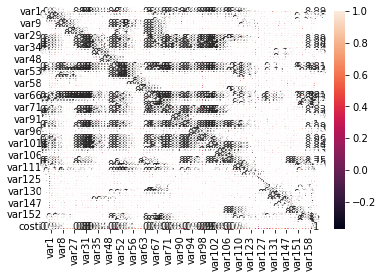

In [27]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [28]:
df.describe()

,var1,var2,var6,var7,var8,var9,var10,var11,var27,var28,var29,var30,var31,var32,var33,var34,var35,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var63,var64,var65,var66,var67,var68,var69,var70,...,var97,var98,var99,var100,var101,var102,var103,var104,var105,var106,var107,var108,var109,var110,var111,var112,var113,var123,var124,var125,var126,var127,var128,var129,var130,var131,var141,var142,var143,var147,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros,costi
count,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,...,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6.471000e+03,6471.000000,6471.000000,6471.000000,6.471000e+03,6.471000e+03,6.471000e+03,6471.000000,6.471000e+03
mean,8.443076e+06,8.012686e+06,3.850410e+05,3.368452e+05,2.730831e+05,2.359174e+06,2.245647e+06,2.144115e+06,1.482593e+06,1.407929e+06,1.315606e+06,2.459037e+06,2.434533e+06,2.306686e+06,1.707722e+06,1.712182e+06,1.629234e+06,6.665511e+05,6.405602e+05,5.730352e+05,6.374203e+04,5.845438e+04,5.355789e+04,7.848543e+06,7.519203e+06,7.012722e+06,2.739339e+06,2.570260e+06,2.398190e+06,5.178880e+05,5.094394e+05,5.017252e+05,1.904163e+05,1.870594e+05,1.816612e+05,4.673856e+06,4.535497e+06,4.211696e+06,1.206614e+06,1.119322e+06,...,1.589911e+05,1.339609e+05,5.617531e+06,5.590892e+06,5.238333e+06,1.453900e+06,1.402106e+06,1.353425e+06,1.227690e+05,1.159916e+05,1.106902e+05,9.224214e+05,8.772858e+05,8.256064e+05,2.913881e+05,2.790108e+05,2.559387e+05,1.025243e+05,1.009868e+05,9.956136e+04,1.720193e+04,1.907956e+04,1.445244e+04,5.921189e+04,5.544904e+04,6.112042e+04,9.719990e+04,1.016564e+05,1.148688e+05,1.983456e+05,1.792534e+05,1.822128e+05,23.258847,22.819039,21.919332,1.206614e+06,1.119322e+06,1.046329e+06,8.729717,8.613391e+06
std,1.745423e+07,1.684724e+07,7.191635e+06,5.848297e+06,2.817225e+06,6.241335e+06,6.002057e+06,5.842381e+06,4.293159e+06,4.068752e+06,3.860182e+06,5.103924e+06,5.029402e+06,4.915047e+06,3.816654e+06,3.828578e+06,3.664792e+06,2.290049e+06,2.269897e+06,1.897326e+06,2.512109e+05,2.470783e+05,2.277592e+05,1.875779e+07,1.749158e+07,1.548531e+07,9.018376e+06,8.471234e+06,7.336568e+06,2.006511e+06,1.993702e+06,2.067318e+06,3.447781e+05,3.440073e+05,3.386093e+05,1.096351e+07,1.031886e+07,9.337880e+06,4.826344e+06,3.964658e+06,...,8.314920e+05,7.313321e+05,1.241273e+07,1.239746e+07,1.182960e+07,3.652271e+06,3.535015e+06,3.448046e+06,3.867210e+05,3.133284e+05,2.991274e+05,2.132353e+06,2.021762e+06,1.862647e+06,9.830270e+05,9.359301e+05,7.397046e+05,2.981574e+05,3.344746e+05,3.413628e+05,2.178137e+05,3.563387e+05,1.427338e+05,2.859888e+05,1.885650e+05,2.159145e+05,3.628319e+05,3.635912e+05,3.862543e+05,1.255482e+06,1.244838e+06,1.038221e+06,49.106894,49.058104,46.644593,4.826344e+06,3.964658e+06,3.348739e+06,6.769308,1.782583e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.378900e+04,2.986700e+04,4.631000e+03,-7.512608e+07,-4.1774

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 91 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   var1         6471 non-null   int64
 1   var2         6471 non-null   int64
 2   var6         6471 non-null   int64
 3   var7         6471 non-null   int64
 4   var8         6471 non-null   int64
 5   var9         6471 non-null   int64
 6   var10        6471 non-null   int64
 7   var11        6471 non-null   int64
 8   var27        6471 non-null   int64
 9   var28        6471 non-null   int64
 10  var29        6471 non-null   int64
 11  var30        6471 non-null   int64
 12  var31        6471 non-null   int64
 13  var32        6471 non-null   int64
 14  var33        6471 non-null   int64
 15  var34        6471 non-null   int64
 16  var35        6471 non-null   int64
 17  var45        6471 non-null   int64
 18  var46        6471 non-null   int64
 19  var47        6471 non-null   int64
 20  var48   

In [30]:
X = df.iloc[:,0:-2] # Features tutte le 95variabili... perchè non -1? non voglio la colonna Total_Zeros che ho aggiunto per filtrare il threshold degli zeri riga
y = df.iloc[:,-1]     # Target
#or
#y = df['costi']

In [31]:
X.shape,y.shape

((6471, 89), (6471,))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

def overfit_eval(model, X, y):

    """
    model: il nostro modello predittivo già addestrato
    X: una tupla contenente le prorietà del train set e test set (X_train, X_test)
    y: una tupla contenente target del train set e test set (y_train, y_test)
    """

    y_pred_train = model.predict(X[0])
    y_pred_test = model.predict(X[1])

    mse_train = mean_squared_error(y[0], y_pred_train)
    mse_test = mean_squared_error(y[1], y_pred_test)

    r2_train = r2_score(y[0], y_pred_train)
    r2_test = r2_score(y[1], y_pred_test)

    print("Train set:  MSE="+str(mse_train)+" R2="+str(r2_train))
    print("Test set:  MSE="+str(mse_test)+" R2="+str(r2_test))

In [35]:
from sklearn.linear_model import ElasticNet

alphas = [0.0001, 0.001, 0.01, 0.1 ,1 ,10]

for alpha in alphas:
    print("Lambda is: "+str(alpha))
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic.fit(X_train, y_train)
    overfit_eval(elastic, (X_train, X_test),(y_train, y_test))

Lambda is: 0.0001
Train set:  MSE=89344830321.54019 R2=0.9997250748879024
Test set:  MSE=264660454811.62296 R2=0.999120004409854
Lambda is: 0.001
Train set:  MSE=89344831258.33418 R2=0.9997250748850198
Test set:  MSE=264660481233.96262 R2=0.9991200043219999
Lambda is: 0.01
Train set:  MSE=89344840633.9318 R2=0.9997250748561699
Test set:  MSE=264660745401.85104 R2=0.999120003443642
Lambda is: 0.1
Train set:  MSE=89344935151.83148 R2=0.9997250745653267
Test set:  MSE=264663381537.11502 R2=0.9991199946784965
Lambda is: 1
Train set:  MSE=89345951921.07413 R2=0.9997250714366017
Test set:  MSE=264689198836.90088 R2=0.9991199088360159
Lambda is: 10
Train set:  MSE=89360136718.84029 R2=0.9997250277882216
Test set:  MSE=264901989490.47122 R2=0.9991192013074321


In [36]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [37]:
elastic.intercept_

-5964.059368280694

In [38]:
elastic.coef_

array([ 8.08524586e-01,  1.26982052e-01,  8.42909853e-02, -6.38518438e-02,
       -3.33918468e-02,  1.04913636e-01, -6.97361992e-02, -6.43632118e-02,
       -7.16017907e-01,  1.30522100e+00, -5.96232266e-01,  5.94298601e-02,
       -8.52409946e-02, -1.22477545e-02,  2.33867194e-02, -8.12647229e-03,
       -7.65448779e-03,  1.03699341e-01, -1.38619117e-01, -6.79392870e-03,
       -8.20368859e-02, -1.03226193e-01,  1.38228238e-01, -1.06305130e-02,
        2.44267123e-02,  3.37531948e-03, -6.50686946e-02,  6.39475694e-02,
        1.54510144e-02,  1.51799088e-02, -4.99382449e-02,  4.23975142e-02,
        5.61450833e-01, -1.12021555e+00,  5.84531291e-01, -5.98917068e-02,
        6.37876676e-02,  1.29305280e-02,  2.01959063e-01,  3.78312663e-02,
       -7.78391020e-02, -2.53428269e-02,  7.27321923e-04,  1.43865159e-02,
       -1.33568720e-01,  1.36420811e-01,  4.23332042e-03,  3.67672760e-01,
       -2.76480141e-01, -1.35297270e-01, -8.56182625e-01,  5.82525454e-01,
        1.39951101e-01,  

In [39]:
y_pred = elastic.predict(X_test)

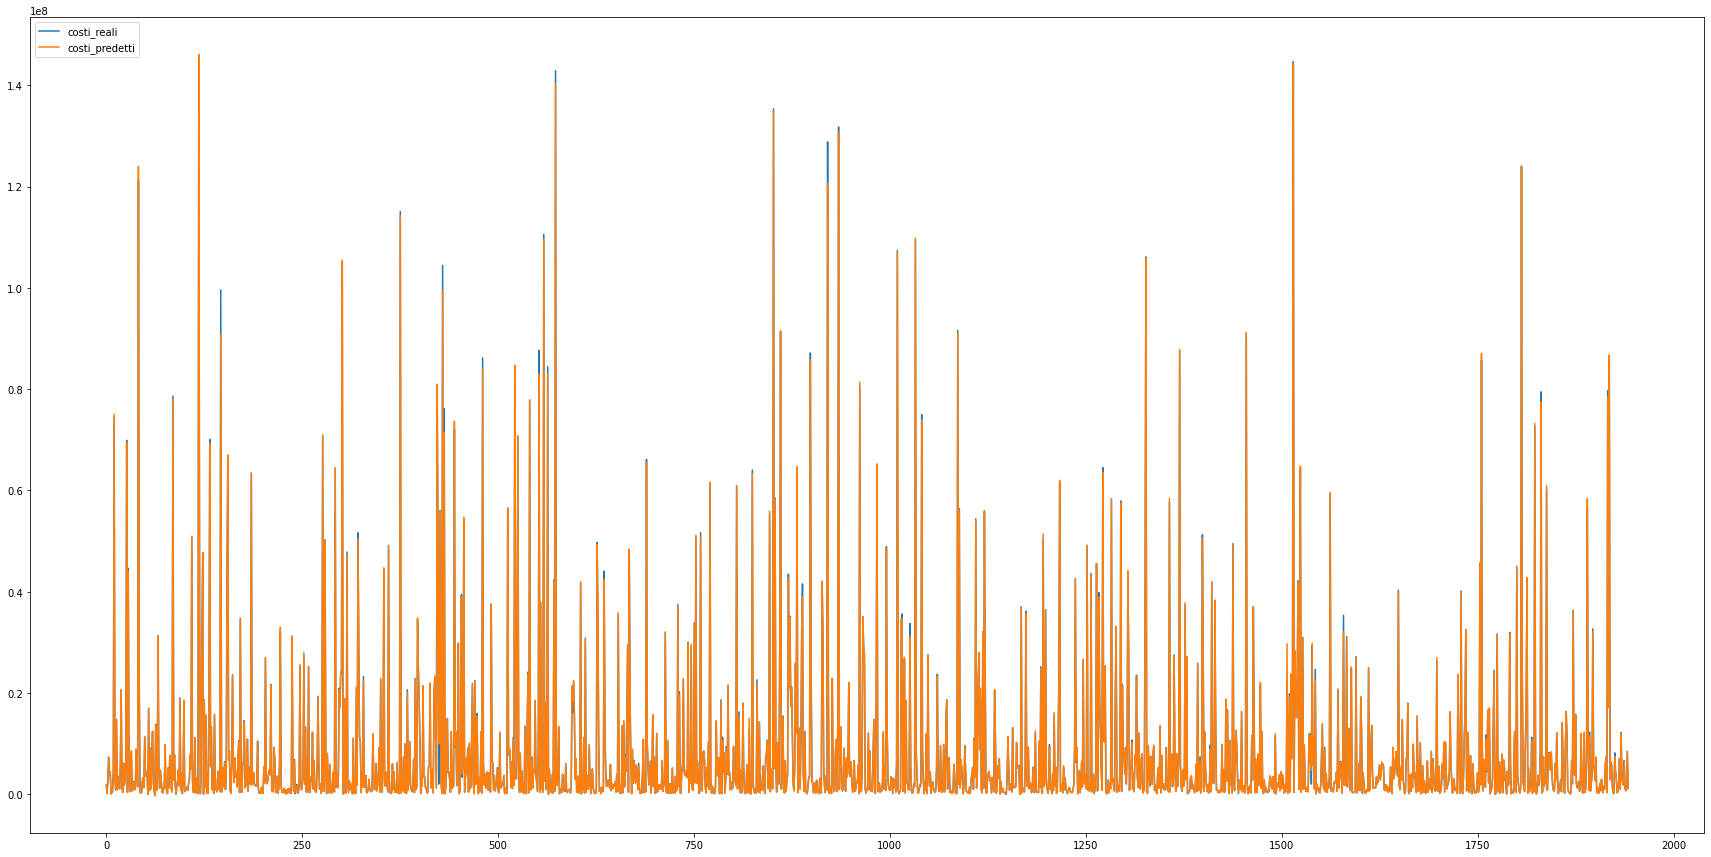

In [40]:
import numpy as np
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)


plt.figure(figsize=(30,15))
plt.plot(x, y_test, label='costi_reali')
plt.plot(x, y_pred, label='costi_predetti')
plt.legend(loc=2);

## Riduciamo il numero di variabili: "Feature Engineering"

In [41]:
# Al momento abbiamo 95 regressori!!!!!!! insostenibile

In [42]:
corrmat = df.corr()
corrmat.index.values

array(['var1', 'var2', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11',
       'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33',
       'var34', 'var35', 'var45', 'var46', 'var47', 'var48', 'var49',
       'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56',
       'var57', 'var58', 'var59', 'var63', 'var64', 'var65', 'var66',
       'var67', 'var68', 'var69', 'var70', 'var71', 'var84', 'var85',
       'var86', 'var90', 'var91', 'var92', 'var93', 'var94', 'var95',
       'var96', 'var97', 'var98', 'var99', 'var100', 'var101', 'var102',
       'var103', 'var104', 'var105', 'var106', 'var107', 'var108',
       'var109', 'var110', 'var111', 'var112', 'var113', 'var123',
       'var124', 'var125', 'var126', 'var127', 'var128', 'var129',
       'var130', 'var131', 'var141', 'var142', 'var143', 'var147',
       'var148', 'var149', 'var150', 'var151', 'var152', 'var156',
       'var157', 'var158', 'Total_Zeros', 'costi'], dtype=object)

In [43]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [44]:
threshold_corr = 0.90
corr_value = getCorrelatedFeature(corrmat['costi'], threshold_corr)
corr_value

,Corr Value
var1,0.986923
var2,0.979383
var93,0.998298
var94,0.986096
var95,0.978434
var99,0.958575
var100,0.946394
var101,0.938331
costi,1.000000


In [45]:
df_rid = df[corr_value.index]
df_rid

,var1,var2,var93,var94,var95,var99,var100,var101,costi
0,147823139,148193655,145914503,148992105,149021406,85824629,86758885,83651116,144205134
1,147562322,163251010,142727898,150222876,166417107,102237238,113037130,131392006,140165127
2,147562000,142652000,148757000,153783000,148906000,117422000,111227000,108035000,145190000
3,147067625,140160124,119349203,145528364,143260149,105779603,129982682,121831610,112760368
4,145273739,127413305,174796438,148011089,130682792,149110551,119058121,106955719,171980718
...,...,...,...,...,...,...,...,...,...
6466,0,0,580433,505522,441838,0,0,0,30000
6467,0,0,196707,137271,126648,148366,47631,0,7369
6468,0,0,534634,597363,560580,163,206,1144,0
6469,0,0,230001,232342,231989,0,0,7,0


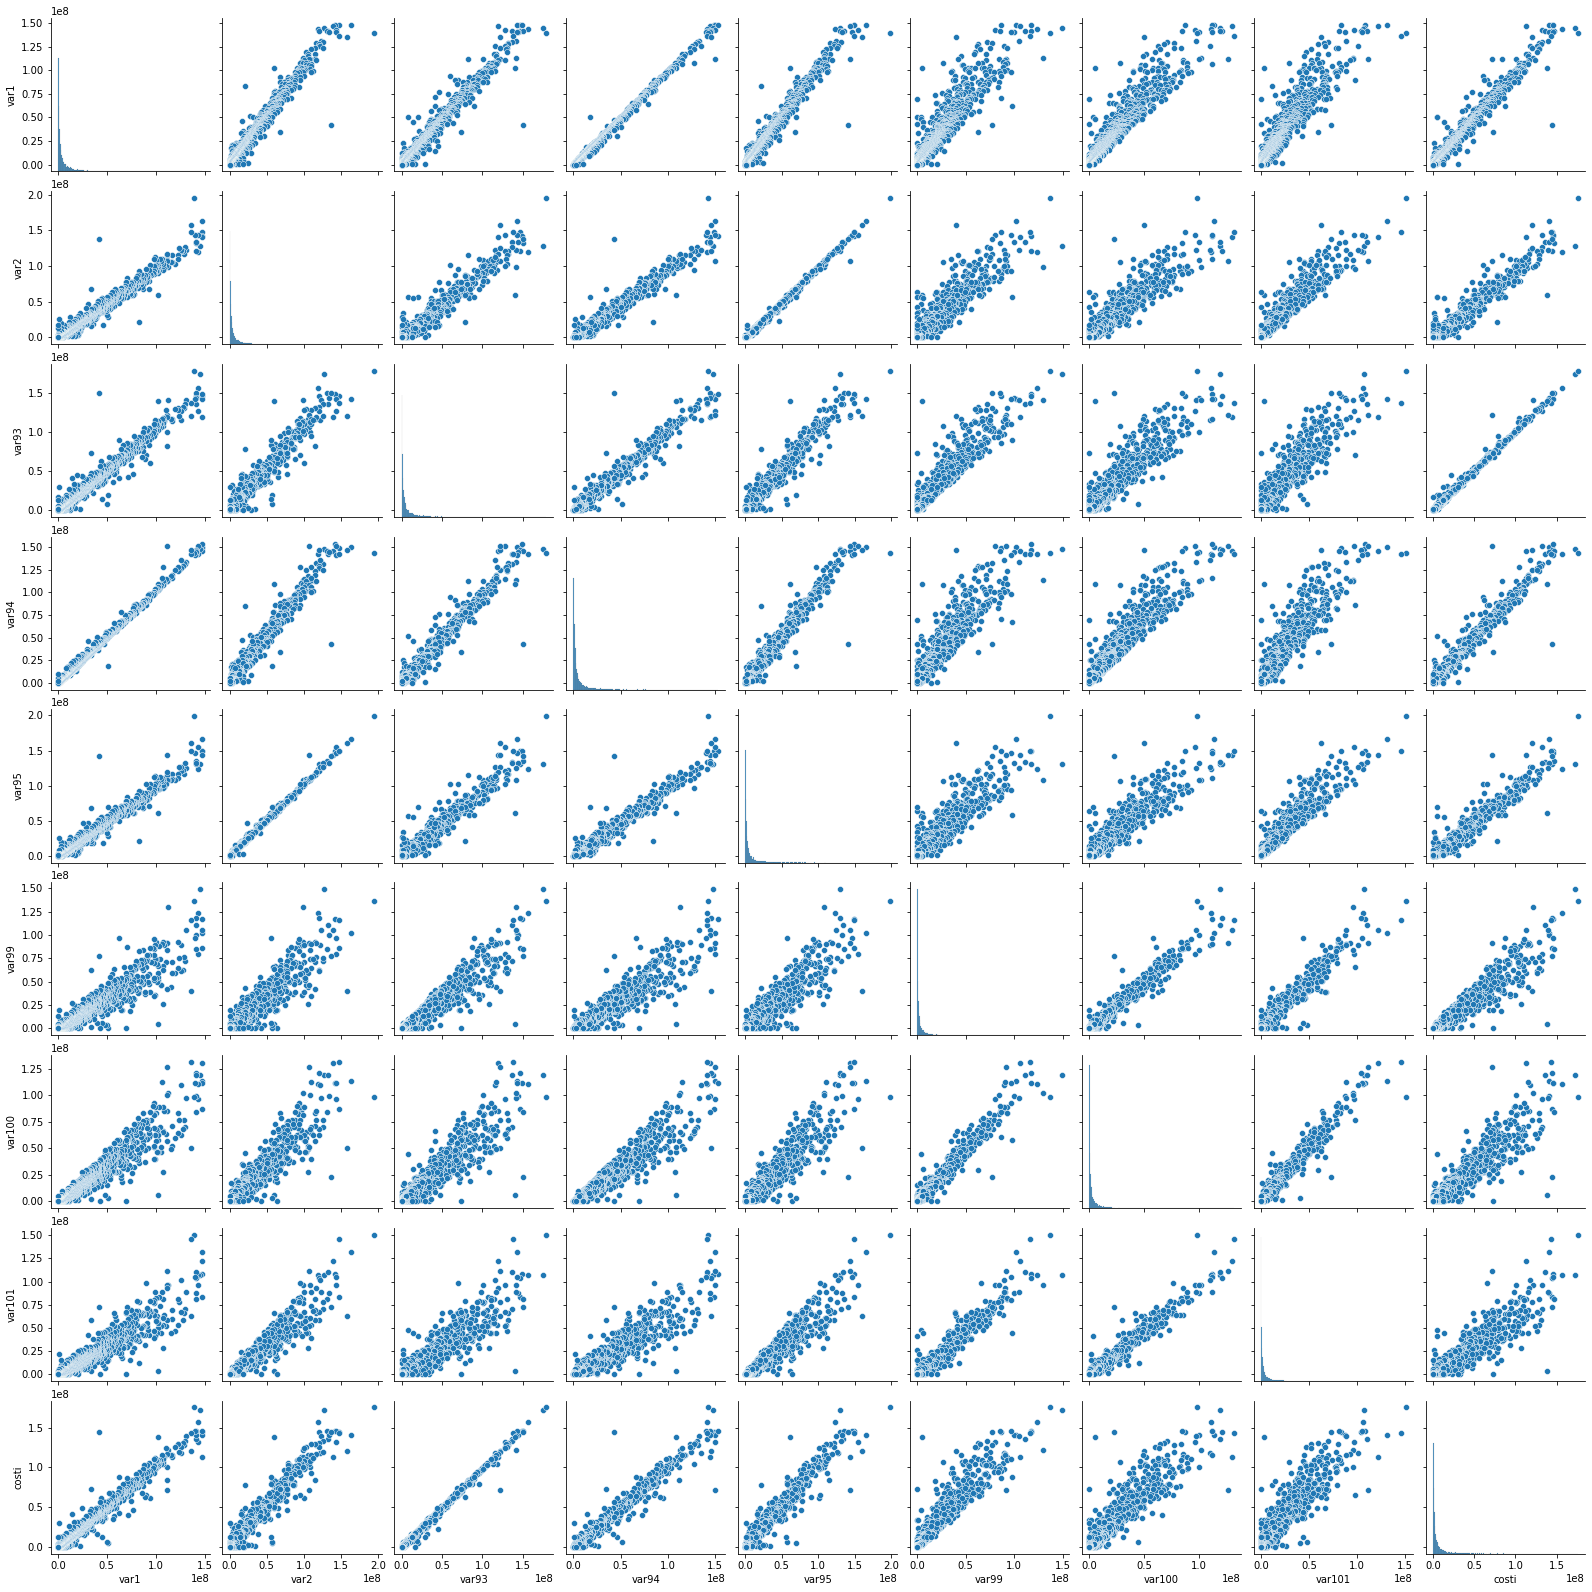

In [46]:
sns.pairplot(df_rid)

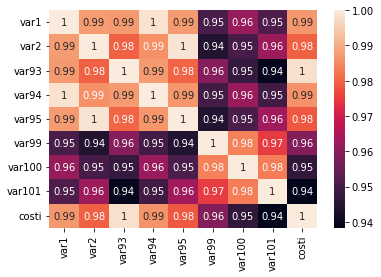

In [47]:
sns.heatmap(df_rid.corr(numeric_only=True), annot=True);

In [48]:
X = df_rid.drop(columns=['costi'])
y = df_rid['costi']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 667,
                                                    )

In [50]:
model_slim = ElasticNet(alpha=0.01, l1_ratio=0.5)
model_slim.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [51]:
y_pred = model_slim.predict(X_test)

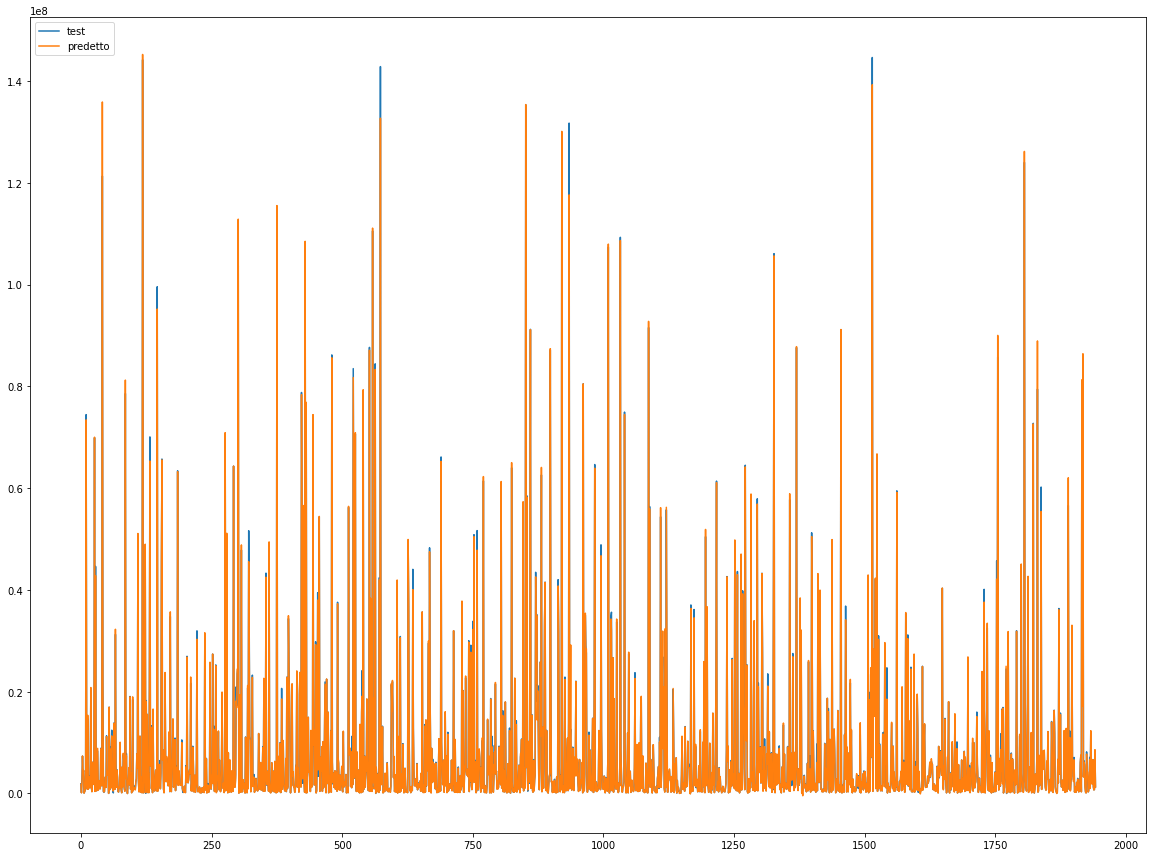

In [52]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('R2_score: ', round(r2score,4))
print('MAE: ', round(mae,2))
print('MSE: ', round(mse,2))
print('RMSE: ', round(rmse,2))
print('MAPE: ', round(mape,2))

R2_score:  0.9963
MAE:  277687.64
MSE:  1116571530120.09
RMSE:  1056679.48
MAPE:  4.0987279413243174e+17


In [54]:
import joblib

## to save a model   1056679.48
joblib.dump(model_slim,'regression_real_case8_input.pkl')

['regression_real_case8_input.pkl']

In [55]:
## to load model
loaded_model = joblib.load('regression_real_case8_input.pkl')
loaded_model

ElasticNet(alpha=0.01)

In [56]:
test = X.iloc[0:1].values[0].tolist()
test

[147823139,
 148193655,
 145914503,
 148992105,
 149021406,
 85824629,
 86758885,
 83651116]

In [57]:
#res = loaded_model.predict([[1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000]])[0]
res = loaded_model.predict([test])[0]

round(res,2)

145241574.41

In [58]:
# intercetta
loaded_model.intercept_

-29554.255488868803

In [59]:
# Tabella per excel 
beta ={
        'variabile' : X.columns.to_list(),
        'pesi':loaded_model.coef_.tolist()
        }
tab = pd.DataFrame(beta)
tab

# costi = intercetta + 0.261505 * var1 + 0.572213 * var2 + 0.913673 * var93 + (-0.183165) * var94 + (-0.561466) * var95 + 0.108055 * var99 + (-0.057827) * var100 + (-0.059076) * var101

,variabile,pesi
0,var1,0.421057
1,var2,0.599250
2,var93,1.001791
3,var94,-0.436444
4,var95,-0.578536
5,var99,-0.006109
6,var100,0.078767
7,var101,-0.083922


<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/didit.png' width=650>